# Mini Project

## 자전거 수요량 예측 데이터 분석  
https://www.kaggle.com/c/bike-sharing-demand



### 1. 가설 설정
데이터 분석 전에 데이터 간의 연관성에 대한 임의의 가설 설정하기

### 2. 데이터 시각화 
4종류 이상의 시각화 기법을 사용하여 그래프 그리기
Seaborn 라이브러리 활용

### 3. 데이터 분석
각 그래프로부터 얻을 수 있는 의미 도출

### 4. 최초의 가설 검정
가설이 유의미한지 여부 판단하기

In [1]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# 읽어드릴 파일 경로 : /dataset/bike_sharing_demand_train.csv
filepath = "./dataset/bike_sharing_demand_train.csv"
data = pd.read_csv(filepath)

In [3]:
data.head(100)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
95,2011-01-05 04:00:00,1,0,1,1,9.84,11.365,48,15.0013,0,2,2
96,2011-01-05 05:00:00,1,0,1,1,9.02,11.365,47,11.0014,0,3,3
97,2011-01-05 06:00:00,1,0,1,1,8.20,9.850,47,15.0013,0,33,33
98,2011-01-05 07:00:00,1,0,1,1,7.38,9.090,43,12.9980,1,87,88


In [4]:
# 양의 상관관계
# 낮시간, 낮은습도, 휴일, 적당한온도, 낮은바람속도, 계절: 봄,여름
# barplot, regplot, heatmap, violiin point

In [5]:
# 데이터 타입변경: object -> datetime
data['datetime'] = data['datetime'].astype('datetime64')
# 데이터 타입 확인
data.dtypes

datetime      datetime64[ns]
season                 int64
holiday                int64
workingday             int64
weather                int64
temp                 float64
atemp                float64
humidity               int64
windspeed            float64
casual                 int64
registered             int64
count                  int64
dtype: object

In [6]:
# 데이터 타입 변경: object -> datatime
data['year'] = data['datetime'].dt.year
data['month'] = data['datetime'].dt.month
data['day'] = data['datetime'].dt.day
data['hour'] = data['datetime'].dt.hour

data.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2011,1,1,0
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,2011,1,1,1
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2011,1,1,2
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,2011,1,1,3
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,2011,1,1,4


### 풍속이 클수록 사람들의 자전거 이용횟수는 적을것이다.

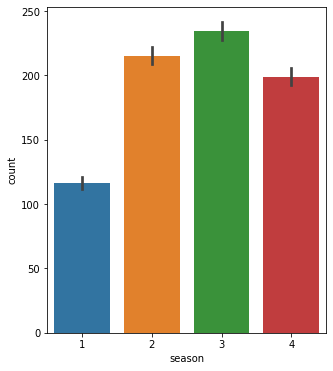

In [8]:
plt.figure(figsize=(5, 6))
sns.barplot(x='season', y='count', data=data)

### 봄에는 상대적으로 자전거를 타는 사람이 다른 계절에 비해 적었다.

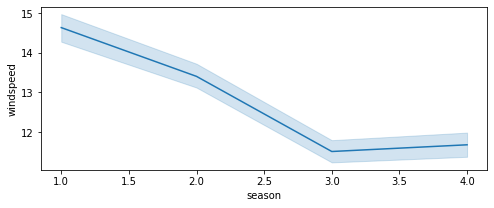

In [10]:
# 봄에는 상대적으로 자전거를 타는 사람이 다른 계절에 비해 적었다.
# why?  봄에 바람이 가장 세게 불었기 때문
# Thus, 자전거를 이용하는 횟수와 바람속도와는 부의 상관관계가 있다.
plt.figure(figsize=(8, 3))
sns.lineplot(x='season', y='windspeed', data=data)

### 휴일에는 여유가 많으므로 자전거 이용횟수가 그러지않은날에 비해 더 많을것이다.

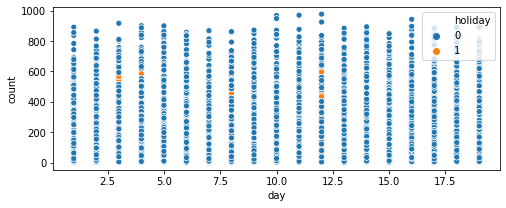

In [30]:
plt.figure(figsize=(8, 3))
sns.scatterplot(x='day', y='count', hue='holiday', data=data)

In [13]:
# 가정과는 반대로 휴일이 아닌 날에 사람들은 더 많이 자전거를 이용했다.
# why? 사람들은 일하는 날에 자전거를 타고 출퇴근하는 횟수가 많기 때문이다.

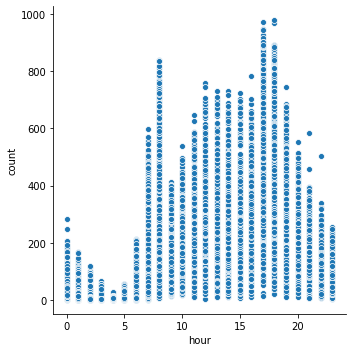

In [28]:
sns.relplot(x='hour', y="count", data = data)

### 습도가 높을수록 땀이 많이 나기때문에 사람들은 자전거 타기를 꺼려한다. 

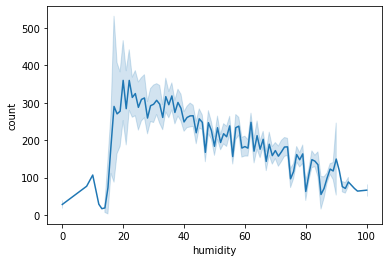

In [15]:
sns.lineplot(x='humidity', y='count', data=data)

In [16]:
# 그래프에 따르면 습도가 높을수록 자전거 이용횟수가 점점 하락하는것을 볼수있다.

### 춥고 더울수록 사람들은 자전거를 이용하지 않을것이다.

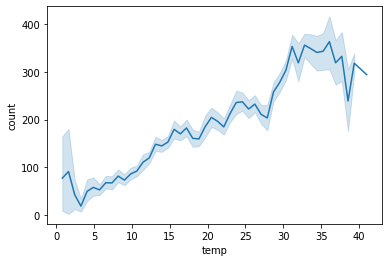

In [18]:
sns.lineplot(x='temp', y='count', data=data)

In [19]:
# 온도가 저점일 경우 더욱 뚜렷하게 사람들이 자전거를 타지 않는것을 볼수있다.
# 40도가 되면서 자전거 이용횟수는 하락하는 추세지만, 사람들은 온도가 낮은것보단 높을때 자전거를 타는것을 선호한다.

### 날씨가 맑을수록 사람들은 자전거를 많이 탈것이다.

In [ ]:
# 날씨가 맑은 1에서 가장 많이 타는것으로 나타나고 안개낀 날씨에도 자전거를 많이 타는것으로 나온다.

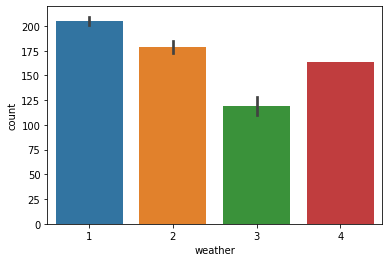

In [31]:
sns.barplot(x='weather', y='count', data=data)

### 대여량과 비회원제 비율은 정관계에 있다.

In [ ]:
# 대여량과 비회원제 비율은 봄, 겨울에 낮고 여름, 가을에 높은 양상을 보이는 정관계에 있다.

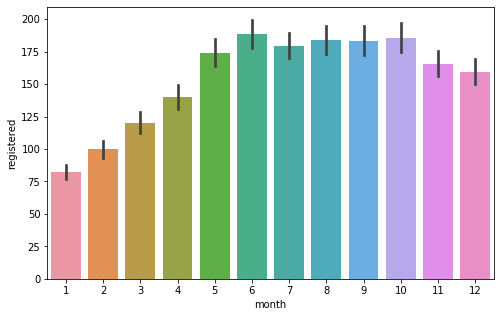

In [22]:
plt.figure(figsize=(8, 5))
sns.barplot(data=data, x="month", y="registered")

### 대여량과 회원제 비율은 정관계에 있으며, 비회원제 비율보다 회원제 비율이 높다

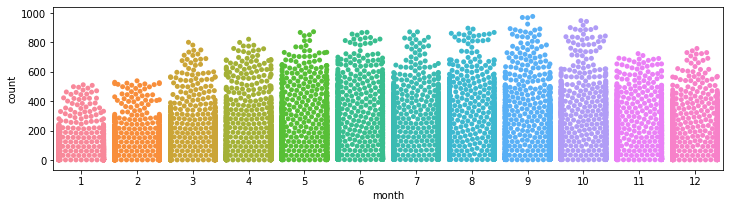

In [24]:
plt.figure(figsize=(12, 3))
sns.swarmplot(data=data, x="month", y="count")